## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [84]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

#### Genre analysis-what genres are consistent in box office

In [85]:
#import the movie info tsv file
movie_info_df = pd.read_csv("rt.movie_info.tsv", delimiter="\t")
print(movie_info_df.shape)
movie_info_df.head()

(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [86]:
movie_info_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [87]:
#most watched genres group by genre
movie_drama = movie_info_df["genre"].value_counts()
print(movie_drama)

# Extract the top N genres and their counts
top_genres = movie_drama.index[:10]  # Change 5 to the desired number of top genres
genre_counts_top = movie_drama[:10]


genre
Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness       

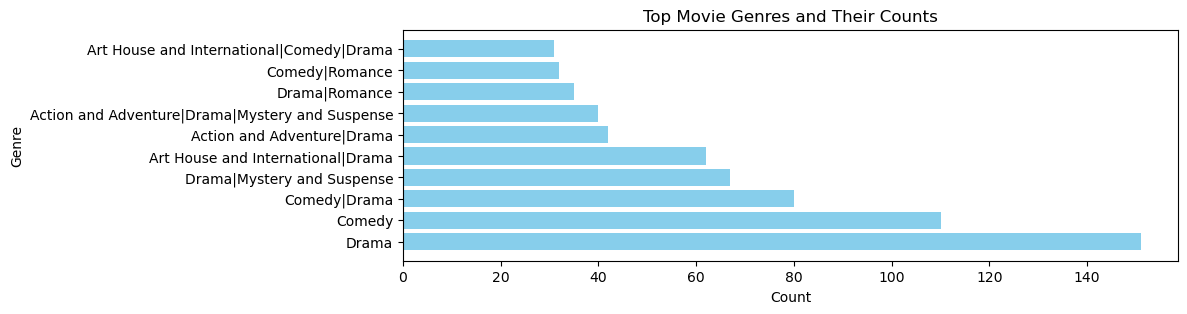

In [88]:
plt.figure(figsize=(10, 3))
plt.barh(top_genres, genre_counts_top, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top Movie Genres and Their Counts')
plt.show()

###### This shows Drama is most frequently watched movie according to the dataset genre followed by comedy then a combination of both comedy and drama

In [89]:
movie_info_df["studio"].value_counts()

studio
Universal Pictures            35
Paramount Pictures            27
20th Century Fox              26
Sony Pictures Classics        22
Warner Bros. Pictures         21
                              ..
Orion Pictures Corporation     1
Factory 25                     1
A24 and DIRECTV                1
First Look Pictures            1
IDP Distribution               1
Name: count, Length: 200, dtype: int64

In [90]:
#output containing basic summary statistics about the data 
movie_stats = movie_info_df.describe()
movie_stats

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [91]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [92]:
#converting runtime to int
movie_info_df['runtime'] = movie_info_df['runtime'].str.extract('(\d+)').fillna(0).astype(int)

In [93]:
# average runtime of all mvoies genres
mean_ = movie_info_df["runtime"].mean()
median_ = movie_info_df["runtime"].median()
print(f"mean:{mean_}")
print(f"mean:{median_}")

mean:101.96858974358975
mean:100.0


The mean and median shows a good number of movies lie around 100minutes meaning more emphasis on making movies that last close to about 100 minutes

In [94]:
#finding 
drama = movie_info_df[(movie_info_df['genre'] == 'Drama') & (movie_info_df['runtime'] > 0)]
drama.head()
len(drama)

146

This dataset shows movie that contain drama,or drama and a combination of a different movie


### Movie budget- What is the cost of producing a movie

##### This part looks at what the company has to spend and what would be gained in domestic stage, international or worldwide and is it making a profit or a loss

In [95]:
budget_df= pd.read_csv("tn.movie_budgets.csv",index_col=0)
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [96]:
#removing $ sign and (,) comma for statistical calculation
budget_df['production_budget'] = budget_df['production_budget'].str.replace('[\$,]', '', regex=True)

budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('[\$,]', '', regex=True)

budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('[\$,]', '', regex=True)
budget_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [97]:
#converting to int64
budget_df['production_budget'] = budget_df['production_budget'].astype('int64')
budget_df['domestic_gross'] = budget_df['domestic_gross'].astype('int64')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].astype('int64')
budget_df.head(5)
type(budget_df['worldwide_gross'])

pandas.core.series.Series

In [98]:
#calculating international gross
budget_df['international_gross'] = (budget_df['worldwide_gross']) - (budget_df['domestic_gross'])
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,654000000
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914


In [99]:
budget_df["gross_difference"] = (budget_df["international_gross"]) - (budget_df["domestic_gross"])
budget_df.drop(3)
budget_df.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,gross_difference
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,1255330029
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,563536125
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,64237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,485002227
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,76358983


In [100]:

"""from the above claculation we can see that more of the movie selling 
is from international audience but 

"""

'from the above claculation we can see that more of the movie selling \nis from international audience but \n\n'

In [101]:
#check for duplicates
budget_df["movie"].duplicated(keep = False).sort_values()
budget_df.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,gross_difference
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,1255330029
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,563536125
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,64237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,485002227
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,76358983


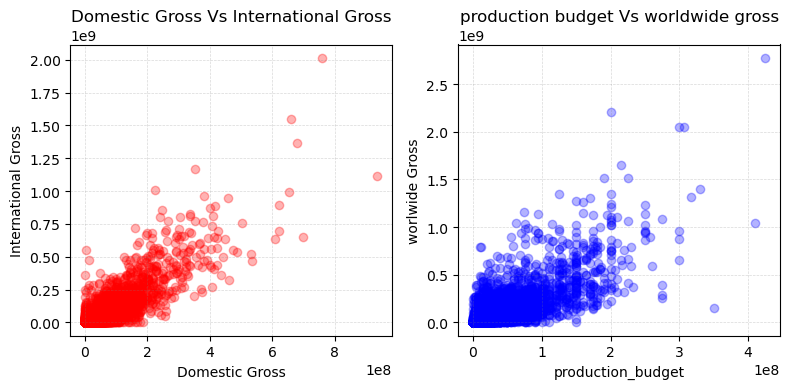

In [191]:

fig, ax = plt.subplots(figsize=(8, 4), ncols=2)

# Scatter plot in the first subplot
ax[0].scatter(x=budget_df["domestic_gross"], y=budget_df["international_gross"], alpha=0.3, color='red')
ax[0].set_xlabel("Domestic Gross")
ax[0].set_ylabel("International Gross")
ax[0].set_title("Domestic Gross Vs International Gross")
ax[0].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.3)

# You can add another plot or modify the first one in the second subplot (ax[1]) if needed


ax[1].scatter(x=budget_df["production_budget"], y=budget_df["worldwide_gross"], alpha=0.3, color='blue')
ax[1].set_xlabel("production_budget")
ax[1].set_ylabel("worlwide Gross")
ax[1].set_title("production budget Vs worldwide gross")
ax[1].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()


In [103]:
#calculating profit
budget_df["profits"] = (budget_df['worldwide_gross'])-(budget_df['production_budget'])
budget_df.sort_values(by=["production_budget"])
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,gross_difference,profits
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,1255330029,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,563536125,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,64237650,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,485002227,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,76358983,999721747
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995,179986770,1747311220
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718,690503236,1748134200
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,654000000,344579575,663420425
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914,197896619,355945209


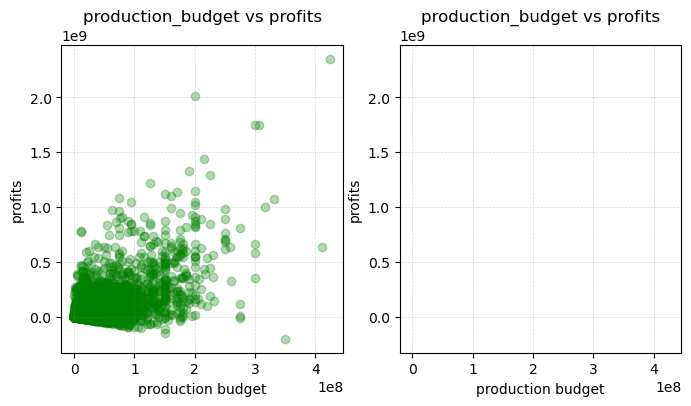

In [207]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)

# Scatter plot in the first subplot
ax[0].scatter(x=budget_df["production_budget"], y=budget_df["profits"], alpha=0.3, color='green')
ax[0].set_xlabel("production budget")
ax[0].set_ylabel("profits")
ax[0].set_title("production_budget vs profits")
ax[0].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.3)

# Scatter plot in the first subplot
ax[1].bar(x=budget_df["production_budget"], height=budget_df["profits"], alpha=0.3, color='green')
ax[1].set_xlabel("production budget")
ax[1].set_ylabel("profits")
ax[1].set_title("production_budget vs profits")
ax[1].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.3)

In [147]:
described_df = budget_df.describe()
described_df

,production_budget,domestic_gross,worldwide_gross,international_gross,gross_difference,profits
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,7.740807e+06,5.989970e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,6.616959e+07,1.460889e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.062132e+08,-2.002376e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-1.355500e+07,-2.189071e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,-4.296995e+05,8.550286e+06
75%,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,5.724080e+06,6.096850e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,1.255330e+09,2.351345e+09


C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

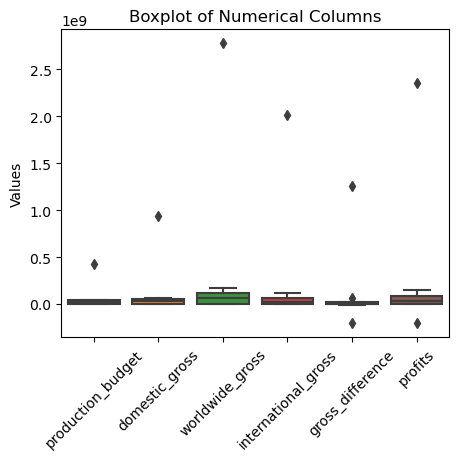

In [144]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=described_df)
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
df = pd.read_csv('datasets/bom.movie_gross.csv')

#filter to relevant year 2018
movies_2018 = df[df['year'] == 2018]

#Sort the movies by international gross earnings
movies_2018_sorted = movies_2018.sort_values('foreign_gross', ascending=True)

#Focus on top 10 movies
top_10_movies_2018 = movies_2018_sorted.head(10)

#Bar graph of top 10 movies
plt.bar(top_10_movies_2018['title'], top_10_movies_2018['foreign_gross'])

#Title and labels
plt.title('Movie trends in the market 2018')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Earning (in millions)')
plt.xticks(rotation=90)

plt.show()

In [257]:
gross_df= pd.read_csv("bom.movie_gross.csv",index_col=0)
gross_df.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [258]:
gross_df = gross_df["studio"].value_counts()
gross_df.head()

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
Name: count, dtype: int64

In [262]:
gross_year_df= gross_df[gross_df["year"] == 2019]
gross_year_df

KeyError: 'year'

In [212]:
lang_df= pd.read_csv("tmdb.movies.csv",index_col=0)
print(lang_df.shape)
lang_df.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [219]:
lang_df = lang_df.describe()
lang_df.drop('id', axis=1, inplace=True)
lang_df

,popularity,vote_average,vote_count
count,8.000000,8.000000,8.000000
mean,6219.632370,6218.616637,6827.900240
std,8870.037888,8870.468422,8758.424427
min,0.600000,0.000000,1.000000
25%,7.678404,7.823440,7.941406
50%,4064.464058,4060.636437,5662.012308
75%,6780.173063,6779.499487,8156.199964
max,26517.000000,26517.000000,26517.000000


C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\.conda\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


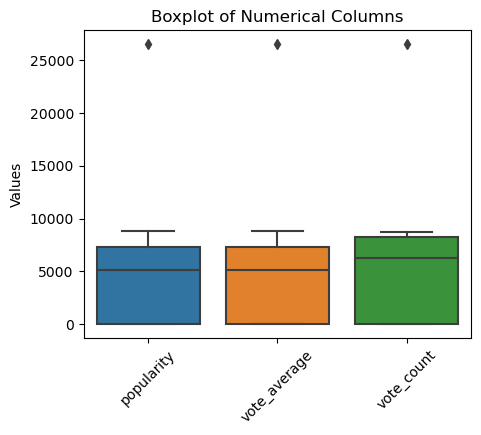

In [224]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=lang_df)
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Dataset to analyze successful movies in terms of actors, directors, and other key crew members.

In [162]:
movie_info_df = pd.read_csv("rt.movie_info.tsv", delimiter="\t")
print(movie_info_df.shape)
movie_info_df.head()


(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [163]:
print(movie_info_df.isna().sum())
movie_info_df['rating'].value_counts()
movie_info_df[(movie_info_df["director"]=='Steven Spielberg') & (movie_info_df["rating"])]


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
56,70,Indiana Jones (Harrison Ford) is no ordinary a...,PG,Action and Adventure,Steven Spielberg,Lawrence Kasdan,"Jun 12, 1981","Oct 21, 2003",NaN,NaN,115 minutes,Paramount Pictures
304,401,"Based on a true story, Steven Spielberg's Schi...",R,Drama,Steven Spielberg,Steven Zaillian,"Dec 15, 1993","Mar 9, 2004",NaN,NaN,196 minutes,Universal Pictures
374,487,Based on J.G. Ballard's autobiographical novel...,PG,Drama,Steven Spielberg,Tom Stoppard|Menno Meyjes,"Dec 9, 1987","Nov 6, 2001",NaN,NaN,153 minutes,NaN
657,841,This is a contemporary retelling of H.G. Wells...,PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Josh Friedman|David Koepp,"Jun 29, 2005","Nov 22, 2005",$,"234,141,872",117 minutes,Paramount Pictures
737,947,"In the summer of 1839, on a stormy night off t...",R,Drama|Mystery and Suspense,Steven Spielberg,NaN,"Dec 12, 1997","Apr 19, 1999",NaN,NaN,155 minutes,NaN
777,1004,Based on the Pulitzer Prize-winning novel by A...,PG-13,Drama,Steven Spielberg,Menno Meyjes,"Dec 16, 1985","Feb 18, 2003",NaN,NaN,154 minutes,NaN
832,1077,Steven Spielberg's phenomenally successful sci...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Steven Spielberg,Michael Crichton|David Koepp|Malia Scotch Marmo,"Jun 11, 1993","Oct 10, 2000",$,"45,299,680",126 minutes,NaN
940,1219,Steven Spielberg filters J. M. Barrie's Peter ...,PG,Action and Adventure|Kids and Family|Science F...,Steven Spielberg,NaN,"Dec 11, 1991","Mar 21, 2000",NaN,NaN,136 minutes,NaN
1410,1819,"In the year 2045, people can escape their hars...",PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Zak Penn|Ernest Cline,"Mar 29, 2018","Jul 3, 2018",NaN,NaN,140 minutes,Warner Bros. Pictures
1471,1892,"Based on Peter Benchley's best-selling novel, ...",PG,Action and Adventure|Drama|Mystery and Suspense,Steven Spielberg,Howard Sackler|Carl Gottlieb|Peter Benchley,"Jun 1, 1975","Jul 11, 2000",NaN,NaN,124 minutes,Universal Pictures


In [225]:
movie_info_df["rating"].value_counts()

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64

In [226]:
movie_info_df["writer"].value_counts()

writer
Woody Allen                                                4
John Hughes                                                3
Jim Jarmusch                                               3
Sylvester Stallone                                         3
Hong Sang-soo                                              3
                                                          ..
Ben Starr                                                  1
Neil Jordan                                                1
Tonino Guerra|Ennio Flaiano|Giorgio Salvioni|Elio Petri    1
Todd Haynes                                                1
Luc Besson                                                 1
Name: count, Length: 1069, dtype: int64

In [165]:
#fchecking to see if both Steven Speilberg and woody Allen have worked together before
movie_info_df["director"].value_counts()
movie_info_df[(movie_info_df["director"]=='Steven Spielberg') & (movie_info_df["writer"]== "Woody Allen")]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio


In [167]:
reviews_df = pd.read_csv("rt.reviews.tsv", delimiter="\t", encoding='latin1')
print(reviews_df.shape)
reviews_df.head(7)

(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"


In [168]:
print(reviews_df.isna().sum())
reviews_df = reviews_df.dropna().head(50)

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


In [169]:
reviews_df.isna().sum()
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [227]:
reviews_df["rating"].value_counts().head()

rating
2/4    8
3/5    4
B      3
3/4    3
4/5    3
Name: count, dtype: int64